##Use tensorflow 2

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


## Install

### TensorTrade

In [2]:
!git clone https://github.com/tensortrade-org/tensortrade.git

Cloning into 'tensortrade'...
remote: Enumerating objects: 287, done.
remote: Counting objects: 100% (287/287), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 7670 (delta 188), reused 171 (delta 85), pack-reused 7383
Receiving objects: 100% (7670/7670), 53.95 MiB | 24.02 MiB/s, done.
Resolving deltas: 100% (5115/5115), done.


### Install ta
Technical Analysis Library in Python

In [3]:
!pip install -U ta

  Created wheel for ta: filename=ta-0.5.15-cp36-none-any.whl size=23439 sha256=cf8d0cb2bec53d787a7ca3f63672935d6f41e6ae39b361c23aa7c51befedddcb
  Stored in directory: /root/.cache/pip/wheels/53/b3/ec/93bd3d04147adcf06fab4ba9926b1150c987d8ffa053374709
Successfully built ta


In [4]:
cd tensortrade

/content/tensortrade


In [5]:
!pip install -r requirements.txt

     |████████████████████████████████| 276kB 3.3MB/s 
     |████████████████████████████████| 5.6MB 9.0MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=61db192e496daa4fa9bec5ed793f8a694623d2371cc09495efc4d84de26309cb
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


### tensorforce

In [0]:
!git clone https://github.com/tensorforce/tensorforce.git

Cloning into 'tensorforce'...
remote: Enumerating objects: 713, done.
remote: Counting objects: 100% (713/713), done.
remote: Compressing objects: 100% (446/446), done.
remote: Total 17726 (delta 480), reused 440 (delta 263), pack-reused 17013
Receiving objects: 100% (17726/17726), 19.68 MiB | 37.59 MiB/s, done.
Resolving deltas: 100% (13866/13866), done.


In [0]:
cd tensorforce

/content/tensortrade/tensorforce


In [0]:
!pip3 install -e .[tf_gpu]

Obtaining file:///content/tensortrade/tensorforce
     |████████████████████████████████| 26.6MB 113kB/s 
     |████████████████████████████████| 380.8MB 45kB/s 
     |████████████████████████████████| 3.8MB 40.1MB/s 
     |████████████████████████████████| 450kB 49.7MB/s 
ERROR: tensorflow 2.1.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.2.0 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorflow-estimator<2.2.0,>=2.1.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.

### stable-baselines

In [0]:
!pip install stable-baselines

     |████████████████████████████████| 256kB 3.5MB/s 


## Train an agent using a locally stored data set

In [0]:
import pandas as pd

def load_csv(filename):
    df = pd.read_csv(filename)

    # Drop empty rows
    df.dropna(how = 'any',inplace=True)

    # Convert the date column type from string to datetime for proper sorting.
    df['date'] = pd.to_datetime(df['date'])

    # Make sure historical prices are sorted chronologically, oldest first.
    df.sort_values(by='date', ascending=True, inplace=True)

    df.reset_index(drop=True, inplace=True)

    # Format timestamps as you want them to appear on the chart buy/sell marks.
    df['date'] = df['date'].dt.strftime('%Y-%m-%d %I:%M %p')

    # PlotlyTradingChart expects 'datetime' as the timestamps column name.
    df.rename(columns={'date': 'datetime'}, inplace=True)

    return df

In [0]:
!mkdir /content/data

### Don't forget to upload ```/content/data/BTCUSD_1d_2011-09-13_to_2019-10-23_bitstamp.csv``` to ```data```

In [35]:
df = load_csv('/content/data/BTCUSD_1d_2011-09-13_to_2019-10-23_bitstamp.csv')
df.head()

,datetime,open,high,low,close,volume
0,2011-09-13 12:00 AM,5.80,6.00,5.65,5.97,58.371382
1,2011-09-14 12:00 AM,5.58,5.72,5.52,5.53,61.145984
2,2011-09-15 12:00 AM,5.12,5.24,5.00,5.13,80.140795
3,2011-09-16 12:00 AM,4.82,4.87,4.80,4.85,39.914007
4,2011-09-17 12:00 AM,4.87,4.87,4.87,4.87,0.300000


## Data Preparation
### Create the dataset features

In [36]:
import ta

from tensortrade.data import DataFeed, Module

dataset = ta.add_all_ta_features(df, 'open', 'high', 'low', 'close', 'volume', fillna=True)
dataset.head(3)

/usr/local/lib/python3.6/dist-packages/ta/trend.py:543: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ta/trend.py:547: RuntimeWarning:

invalid value encountered in double_scalars



,datetime,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,momentum_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dchi,volatility_dcli,trend_macd,trend_macd_signal,trend_macd_diff,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,2011-09-13 12:00 AM,5.80,6.00,5.65,5.97,58.371382,48.364860,58.371382,0.828571,0.000000,50.0,0.000000,0.000000,-47.987813,1000.0,0.0,5.970000,5.97000,5.970000,0.000000,0.000000,0.0,0.0,5.873333,6.223333,5.523333,11.918275,0.638095,0.0,0.0,5.97,5.97,1.0,1.0,0.000000,0.000000,0.000000,5.970000,5.970000,0.0,0.0,0.0,1.0,1.0,0.0,-99.739051,1.000000,0.000000,2341.731832,-997.457088,-997.457088,0.000000,5.825,5.825,2320.507677,2322.613408,4.0,4.0,0.0,5.97,-1.0,-1.0,0.0,0.0,100.0,0.0,50.0,91.428571,91.428571,-8.571429,0.0,5.97,0.0,-99.745709,0.000000,0.000000
1,2011-09-14 12:00 AM,5.58,5.72,5.52,5.53,61.145984,-6.666526,-2.774601,-0.055779,-26.904233,50.0,-67052.646098,-67052.646098,-62.729521,1000.0,0.0,5.750000,6.19000,5.310000,15.304348,0.250000,0.0,0.0,5.731667,6.006667,5.456667,9.595813,0.133333,0.0,0.0,5.53,5.97,0.0,1.0,-0.035100,-0.007020,-0.028080,5.902308,5.937407,0.0,0.0,0.0,1.0,1.0,0.0,-0.014395,1.930233,-66.666667,2341.951832,-997.550796,-997.503942,-0.046854,5.760,5.760,2320.507677,2322.613408,4.0,8.0,-4.0,5.53,-1.0,-1.0,0.0,0.0,0.0,-100.0,50.0,2.083333,46.755952,-97.916667,0.0,5.53,0.0,-7.370184,-7.655911,-7.370184
2,2011-09-15 12:00 AM,5.12,5.24,5.00,5.13,80.140795,0.011874,-82.915396,0.000059,-27.640245,50.0,-149736.472792,-108394.559445,-10.303374,1000.0,0.0,5.543333,6.22945,4.857217,24.754646,0.198788,0.0,0.0,5.528889,5.792222,5.265556,9.525723,-0.257384,0.0,1.0,5.13,5.97,0.0,1.0,-0.094108,-0.024438,-0.069671,5.783491,5.877599,0.0,0.0,0.0,1.0,1.0,0.0,-0.050880,2.834994,-100.000000,2342.158499,-997.638826,-997.548903,-0.089922,5.500,5.500,2320.507677,2322.613408,4.0,12.0,-8.0,6.00,-1.0,6.0,0.0,1.0,0.0,-100.0,50.0,13.000000,35.503968,-87.000000,0.0,5.13,0.0,-7.233273,-7.508216,-14.070352


### add predictions

In [14]:
!pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.7.2-cp36-none-any.whl size=14261 sha256=2eddf60678d5e42ddc5d7fb05f5474a395e233e9fc86c3c2913e92ee6be7be6a
  Stored in directory: /root/.cache/pip/wheels/64/ae/af/51d48fbbca0563036c6f80999b7ce3f097fa591fd165047baf
Successfully built pytrends


In [15]:
cd /content/

/content


In [16]:
%run A2_Functions_ZiyaoCai.py

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



In [0]:
import A2_Functions_ZiyaoCai as A2

In [22]:
X1,X2,y = A2.preprocess(['/content/data/BTCUSD_1d_2011-09-13_to_2019-10-23_bitstamp.csv'])
y1_hat = A2.model('/content/A2_LSTM_Model_ZiyaoCai.h5',X1)
y2_hat = A2.combiner(y1_hat,X2,'/content/A2_combiner_LSTM_ZiyaoCai.h5','/content/scaler.save')

/content/A2_Functions_ZiyaoCai.py:159: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



bitcoin:2011-09-01 2011-09-30
bitcoin:2011-10-01 2011-10-31
bitcoin:2011-11-01 2011-11-30
bitcoin:2011-12-01 2011-12-31
bitcoin:2012-01-01 2012-01-31
bitcoin:2012-02-01 2012-02-29
bitcoin:2012-03-01 2012-03-31
bitcoin:2012-04-01 2012-04-30
bitcoin:2012-05-01 2012-05-31
bitcoin:2012-06-01 2012-06-30
bitcoin:2012-07-01 2012-07-31
bitcoin:2012-08-01 2012-08-31
bitcoin:2012-09-01 2012-09-30
bitcoin:2012-10-01 2012-10-31
bitcoin:2012-11-01 2012-11-30
bitcoin:2012-12-01 2012-12-31
bitcoin:2013-01-01 2013-01-31
bitcoin:2013-02-01 2013-02-28
bitcoin:2013-03-01 2013-03-31
bitcoin:2013-04-01 2013-04-30
bitcoin:2013-05-01 2013-05-31
bitcoin:2013-06-01 2013-06-30
bitcoin:2013-07-01 2013-07-31
bitcoin:2013-08-01 2013-08-31
bitcoin:2013-09-01 2013-09-30
bitcoin:2013-10-01 2013-10-31
bitcoin:2013-11-01 2013-11-30
bitcoin:2013-12-01 2013-12-31
bitcoin:2014-01-01 2014-01-31
bitcoin:2014-02-01 2014-02-28
bitcoin:2014-03-01 2014-03-31
bitcoin:2014-04-01 2014-04-30
bitcoin:2014-05-01 2014-05-31
bitcoin:20

/content/A2_Functions_ZiyaoCai.py:181: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
y2_hat_2 = [i[0] for i in y2_hat.tolist()]

In [37]:
print(len(y2_hat_2))
print(len(dataset))

2922
2942


In [38]:
dataset = dataset[20:]
dataset['close_prediction'] = y2_hat_2
dataset.reset_index(inplace=True,drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
dataset

,datetime,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,momentum_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dchi,volatility_dcli,trend_macd,trend_macd_signal,trend_macd_diff,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,close_prediction
0,2011-10-06 12:00 AM,4.88,4.99,4.80,4.80,170.843549,-1.439304e+02,-9.249394e+01,-0.154194,-5.094384,52.014526,-7.006410e+04,-6.283964e+04,-5.537036,1.030365e+03,0.373184,5.1810,5.999068,4.362932,31.579558,0.267134,0.0,0.0,5.161000,5.530000,4.792000,14.299554,0.010840,0.0,0.0,4.80,6.05,0.0,1.0,-0.233958,-0.196928,-0.037031,5.067173,5.301132,0.000000,43.095600,29.342362,0.886275,1.013725,-0.127451,-0.510352,20.179132,-68.121375,0.5390,-765.307961,-884.096533,118.788571,5.5250,5.525,2320.507677,2322.613408,52.0,56.0,-4.0,6.250000,4.800000,6.250000,0.0,1.0,36.595144,-63.502627,50.000000,0.000000,7.520525,-100.000000,-0.237048,5.487529,-15.194346,-2.439024,-2.469261,-19.597990,-69.669403
1,2011-10-07 12:00 AM,4.80,4.81,4.59,4.61,94.640000,-2.213631e+02,-1.871339e+02,-0.167654,-6.935415,42.307438,-4.532967e+04,-8.916677e+04,-7.913083,9.895799e+02,0.357866,5.1350,5.972628,4.297372,32.624249,0.186615,0.0,0.0,5.057333,5.440333,4.674333,15.146322,-0.083986,0.0,1.0,4.61,6.05,0.0,1.0,-0.253098,-0.208162,-0.044936,4.996839,5.249937,0.000000,41.074491,32.442909,0.826754,1.217105,-0.390351,-0.541237,21.373578,-96.567212,0.5850,-723.761907,-857.167683,133.405776,5.4200,5.420,2320.507677,2322.613408,52.0,88.0,-36.0,6.250000,4.800000,6.250000,0.0,0.0,33.294966,-62.734026,50.000000,1.204819,3.160227,-98.795181,-0.234409,5.388239,-19.405594,-3.958333,-4.038806,-22.780570,-71.924690
2,2011-10-08 12:00 AM,4.57,4.57,3.99,3.99,56.000000,-2.773631e+02,-2.431339e+02,-0.220760,-10.904641,39.095091,-4.350000e+05,-1.431505e+05,-11.277620,8.564910e+02,0.384079,5.0780,6.053102,4.102898,38.404964,-0.057890,0.0,1.0,4.870667,5.311667,4.429667,18.108404,-0.498488,0.0,1.0,3.99,6.05,0.0,1.0,-0.314667,-0.229463,-0.085205,4.841941,5.156608,0.000000,35.956619,40.458572,0.578218,1.261386,-0.683168,-0.595092,22.613717,-163.454303,0.6020,-691.675783,-827.770093,136.094309,5.1200,5.120,2320.507677,2322.613408,52.0,92.0,-40.0,6.183600,4.800000,6.183600,0.0,0.0,25.282634,-62.982097,50.000000,0.000000,0.401606,-100.000000,-0.306739,4.983583,-30.244755,-13.449024,-14.443663,-33.165829,-71.320755
3,2011-10-09 12:00 AM,3.89,3.89,3.89,3.89,11.000000,-2.773631e+02,-2.541339e+02,-0.239895,-9.503978,35.489541,-0.000000e+00,-1.429874e+05,-7.807143,8.350251e+02,0.355671,5.0300,6.131581,3.928419,43.800425,-0.017438,0.0,1.0,4.737667,5.052667,4.422667,13.297685,-0.845503,0.0,1.0,3.89,6.05,0.0,1.0,-0.367297,-0.257030,-0.110267,4.695488,5.062785,0.000000,35.194909,41.719907,0.581532,1.363458,-0.781925,-0.665187,23.607396,-187.575710,1.0200,-655.783418,-795.504200,139.720783,5.0700,5.070,2320.507677,2322.613408,52.0,96.0,-44.0,6.051984,4.800000,6.051984,0.0,0.0,24.268229,-63.328410,50.000000,0.000000,0.401606,-100.000000,-0.484292,4.774479,-31.514085,-2.506266,-2.538207,-34.840871,-73.338043
4,2011-10-10 12:00 AM,3.99,4.51,3.99,4.51,132.500000,-1.448631e+02,-1.216339e+02,-0.119126,3.589447,41.217778,1.412830e+05,-1.329

In [0]:
#dataset.to_csv(r'/content/Project_coinbase_dataset.csv',index=False)

## Create Chart Price History Data
Note: It is recommended to create the chart data *after* creating and cleaning the dataset to ensure one-to-one mapping between the historical prices data and the dataset.

In [43]:
price_history = dataset[['datetime', 'open', 'high', 'low', 'close', 'volume']]  # chart data
display(price_history.head(3))

dataset.drop(columns=['datetime', 'open', 'high', 'low', 'close', 'volume'], inplace=True)

,datetime,open,high,low,close,volume
0,2011-10-06 12:00 AM,4.88,4.99,4.80,4.80,170.843549
1,2011-10-07 12:00 AM,4.80,4.81,4.59,4.61,94.640000
2,2011-10-08 12:00 AM,4.57,4.57,3.99,3.99,56.000000


In [44]:
dataset

,volume_adi,volume_obv,volume_cmf,volume_fi,momentum_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dchi,volatility_dcli,trend_macd,trend_macd_signal,trend_macd_diff,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,close_prediction
0,-1.439304e+02,-9.249394e+01,-0.154194,-5.094384,52.014526,-7.006410e+04,-6.283964e+04,-5.537036,1.030365e+03,0.373184,5.1810,5.999068,4.362932,31.579558,0.267134,0.0,0.0,5.161000,5.530000,4.792000,14.299554,0.010840,0.0,0.0,4.80,6.05,0.0,1.0,-0.233958,-0.196928,-0.037031,5.067173,5.301132,0.000000,43.095600,29.342362,0.886275,1.013725,-0.127451,-0.510352,20.179132,-68.121375,0.5390,-765.307961,-884.096533,118.788571,5.5250,5.525,2320.507677,2322.613408,52.0,56.0,-4.0,6.250000,4.800000,6.250000,0.0,1.0,36.595144,-63.502627,50.000000,0.000000,7.520525,-100.000000,-0.237048,5.487529,-15.194346,-2.439024,-2.469261,-19.597990,-69.669403
1,-2.213631e+02,-1.871339e+02,-0.167654,-6.935415,42.307438,-4.532967e+04,-8.916677e+04,-7.913083,9.895799e+02,0.357866,5.1350,5.972628,4.297372,32.624249,0.186615,0.0,0.0,5.057333,5.440333,4.674333,15.146322,-0.083986,0.0,1.0,4.61,6.05,0.0,1.0,-0.253098,-0.208162,-0.044936,4.996839,5.249937,0.000000,41.074491,32.442909,0.826754,1.217105,-0.390351,-0.541237,21.373578,-96.567212,0.5850,-723.761907,-857.167683,133.405776,5.4200,5.420,2320.507677,2322.613408,52.0,88.0,-36.0,6.250000,4.800000,6.250000,0.0,0.0,33.294966,-62.734026,50.000000,1.204819,3.160227,-98.795181,-0.234409,5.388239,-19.405594,-3.958333,-4.038806,-22.780570,-71.924690
2,-2.773631e+02,-2.431339e+02,-0.220760,-10.904641,39.095091,-4.350000e+05,-1.431505e+05,-11.277620,8.564910e+02,0.384079,5.0780,6.053102,4.102898,38.404964,-0.057890,0.0,1.0,4.870667,5.311667,4.429667,18.108404,-0.498488,0.0,1.0,3.99,6.05,0.0,1.0,-0.314667,-0.229463,-0.085205,4.841941,5.156608,0.000000,35.956619,40.458572,0.578218,1.261386,-0.683168,-0.595092,22.613717,-163.454303,0.6020,-691.675783,-827.770093,136.094309,5.1200,5.120,2320.507677,2322.613408,52.0,92.0,-40.0,6.183600,4.800000,6.183600,0.0,0.0,25.282634,-62.982097,50.000000,0.000000,0.401606,-100.000000,-0.306739,4.983583,-30.244755,-13.449024,-14.443663,-33.165829,-71.320755
3,-2.773631e+02,-2.541339e+02,-0.239895,-9.503978,35.489541,-0.000000e+00,-1.429874e+05,-7.807143,8.350251e+02,0.355671,5.0300,6.131581,3.928419,43.800425,-0.017438,0.0,1.0,4.737667,5.052667,4.422667,13.297685,-0.845503,0.0,1.0,3.89,6.05,0.0,1.0,-0.367297,-0.257030,-0.110267,4.695488,5.062785,0.000000,35.194909,41.719907,0.581532,1.363458,-0.781925,-0.665187,23.607396,-187.575710,1.0200,-655.783418,-795.504200,139.720783,5.0700,5.070,2320.507677,2322.613408,52.0,96.0,-44.0,6.051984,4.800000,6.051984,0.0,0.0,24.268229,-63.328410,50.000000,0.000000,0.401606,-100.000000,-0.484292,4.774479,-31.514085,-2.506266,-2.538207,-34.840871,-73.338043
4,-1.448631e+02,-1.216339e+02,-0.119126,3.589447,41.217778,1.412830e+05,-1.329648e+05,20.842563,8.350251e+02,0.382104,5.0120,6.135007,3.888993,44.812717,0.276493,0.0,0.0,4.681667,5.041667,4.321667,15.379138,0.261574,0.0,0.0,3.89,6.05,0.0,0.0,-0.354887,-0.276601,-0.078286,4.666952,5.021838,0.000000,43.225392,36.550081,0.622144,1.233743,-0.611599,-0.720724,24.687367

## Setup Trading Environment
### Create Data Feeds

In [0]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream, DataFeed, Module
from tensortrade.instruments import USD, BTC
from tensortrade.wallets import Wallet, Portfolio

coinbase = Exchange("coinbase", service=execute_order)(
    Stream("USD-BTC", price_history['close'].tolist())
)


portfolio = Portfolio(USD, [
    Wallet(coinbase, 10000 * USD),
    Wallet(coinbase, 10 * BTC),
])

with Module("coinbase") as coinbase_ns:
    nodes = [Stream(name, dataset[name].tolist()) for name in dataset.columns]

feed = DataFeed([coinbase_ns])
#feed.next()

## Set up the environment

In [46]:
from tensortrade.environments import TradingEnvironment

env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='managed-risk',
    reward_scheme='risk-adjusted',
    window_size=20
)

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32



## Train the agent

In [0]:
!mkdir /content/agents

In [0]:
from tensortrade.agents import DQNAgent

In [49]:
agent = DQNAgent(env)
agent.train(n_episodes=30, n_steps=100, save_path="/content/agents/")

====      AGENT ID: 921c9c38-88ad-4b3e-8a2c-d52b08d46450      ====
[2020-03-22 2:35:25 AM] Episode: 2/30 Step: 50/100
[2020-03-22 2:35:30 AM] Episode: 2/30 Step: 100/100
[2020-03-22 2:35:34 AM] Episode: 3/30 Step: 50/100
[2020-03-22 2:35:39 AM] Episode: 3/30 Step: 100/100
[2020-03-22 2:35:44 AM] Episode: 4/30 Step: 50/100
[2020-03-22 2:35:48 AM] Episode: 4/30 Step: 100/100
[2020-03-22 2:35:53 AM] Episode: 5/30 Step: 50/100
[2020-03-22 2:35:57 AM] Episode: 5/30 Step: 100/100
[2020-03-22 2:36:02 AM] Episode: 6/30 Step: 50/100
[2020-03-22 2:36:07 AM] Episode: 6/30 Step: 100/100
[2020-03-22 2:36:11 AM] Episode: 7/30 Step: 50/100
[2020-03-22 2:36:16 AM] Episode: 7/30 Step: 100/100
[2020-03-22 2:36:20 AM] Episode: 8/30 Step: 50/100
[2020-03-22 2:36:25 AM] Episode: 8/30 Step: 100/100
[2020-03-22 2:36:30 AM] Episode: 9/30 Step: 50/100
[2020-03-22 2:36:35 AM] Episode: 9/30 Step: 100/100
[2020-03-22 2:36:39 AM] Episode: 10/30 Step: 50/100
[2020-03-22 2:36:44 AM] Episode: 10/30 Step: 100/100
[202

89106873.18701546

### Check the results

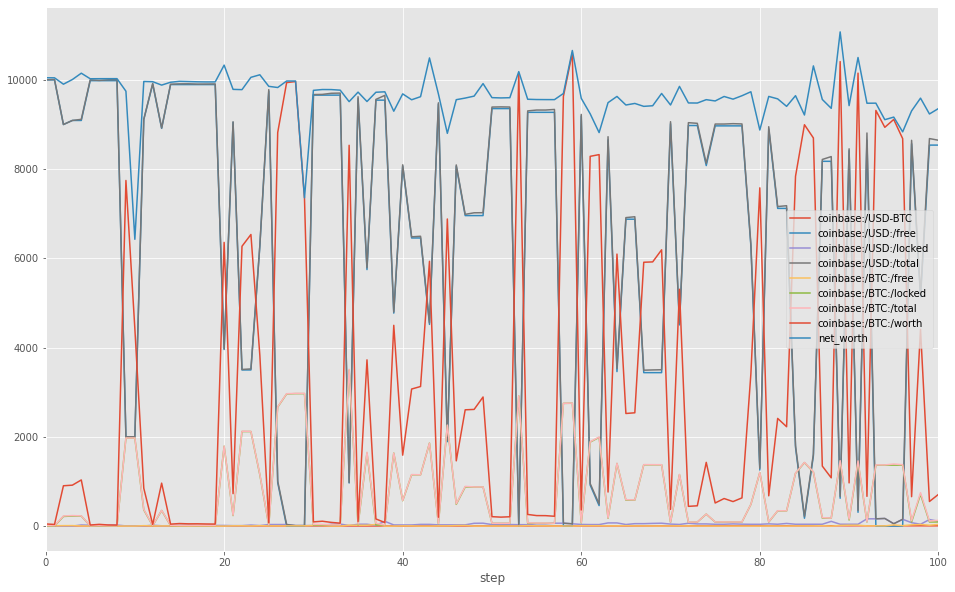

In [53]:
portfolio.performance.plot(figsize=(16,10))

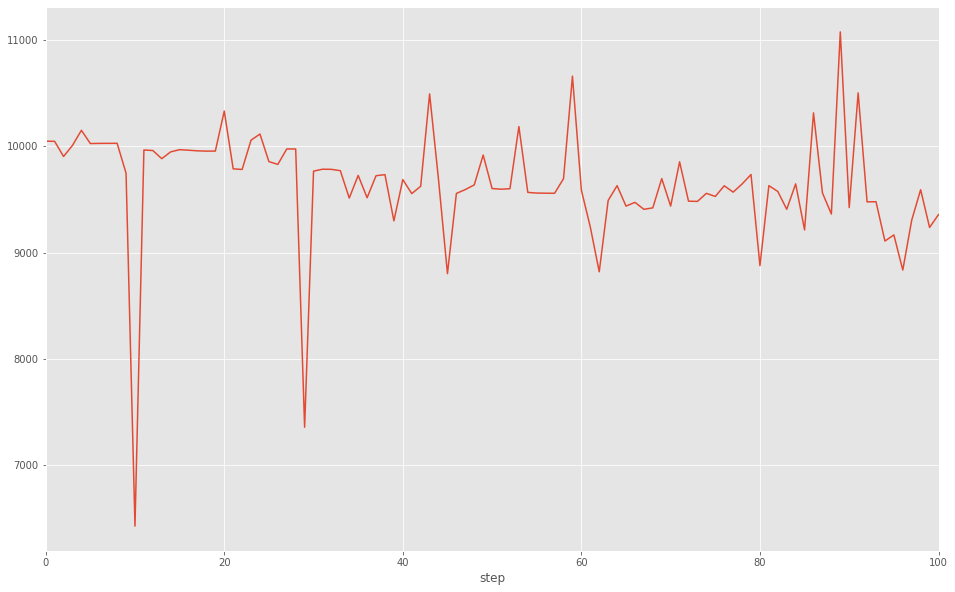

In [51]:
portfolio.performance.net_worth.plot(figsize=(16,10))

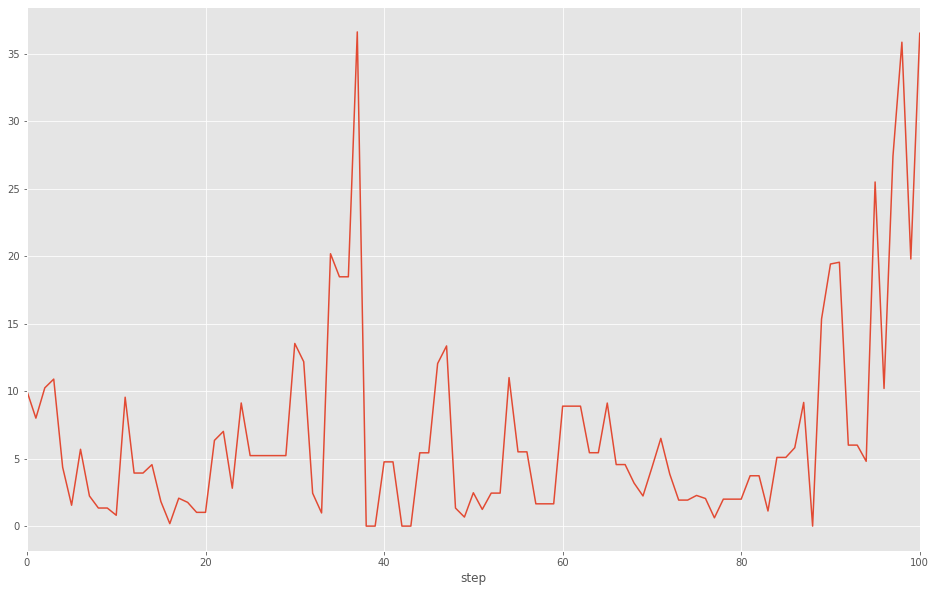

In [57]:
portfolio.performance['coinbase:/BTC:/free'].plot(figsize=(16,10))

## How to evaluate?

TensorTrade is modeled after **OpenAI Gym**. Thus, it is helpful to read the documentation for OpenAI Gym in order to understand TensorTrade.



### Setup Trading Environment
### Create Data Feeds

In [0]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream, DataFeed, Module
from tensortrade.instruments import USD, BTC
from tensortrade.wallets import Wallet, Portfolio

coinbase = Exchange("coinbase", service=execute_order)(
    Stream("USD-BTC", price_history['close'].tolist())
)


portfolio = Portfolio(USD, [
    Wallet(coinbase, 10000 * USD),
    Wallet(coinbase, 10 * BTC),
])

with Module("coinbase") as coinbase_ns:
    nodes = [Stream(name, dataset[name].tolist()) for name in dataset.columns]

feed = DataFeed([coinbase_ns])
#feed.next()

### Set up the environment

In [173]:
from tensortrade.environments import TradingEnvironment

env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='managed-risk',
    reward_scheme='risk-adjusted',
    window_size=20
)

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32



### Load a trained agent

In [0]:
agent = DQNAgent(env)
agent.restore(path="/content/agents/policy_network__5be83276-e3f4-4e75-b55d-e4e2846cc10f__029.hdf5")

### Put it all in a for loop


In [175]:
action = agent.env.action_space.sample()
n_steps = 100
step = 0
while not done and (step < n_steps):
  state, reward, done, info = agent.env.step(action)
  action = agent.get_action(state)
  print('step:', step, '-- action:', action)
  step += 1

step: 0 -- action: 123
step: 1 -- action: 134
step: 2 -- action: 123
step: 3 -- action: 123
step: 4 -- action: 134
step: 5 -- action: 123
step: 6 -- action: 123
step: 7 -- action: 123
step: 8 -- action: 111
step: 9 -- action: 134
step: 10 -- action: 123
step: 11 -- action: 123
step: 12 -- action: 44
step: 13 -- action: 134
step: 14 -- action: 123
step: 15 -- action: 44
step: 16 -- action: 44
step: 17 -- action: 123
step: 18 -- action: 123
step: 19 -- action: 123
step: 20 -- action: 134
step: 21 -- action: 7
step: 22 -- action: 123
step: 23 -- action: 7
step: 24 -- action: 44
step: 25 -- action: 111
step: 26 -- action: 123
step: 27 -- action: 111
step: 28 -- action: 157
step: 29 -- action: 123
step: 30 -- action: 123
step: 31 -- action: 134
step: 32 -- action: 134
step: 33 -- action: 134
step: 34 -- action: 134
step: 35 -- action: 134
step: 36 -- action: 123
step: 37 -- action: 123
step: 38 -- action: 157
step: 39 -- action: 123
step: 40 -- action: 111
step: 41 -- action: 123
step: 42 -

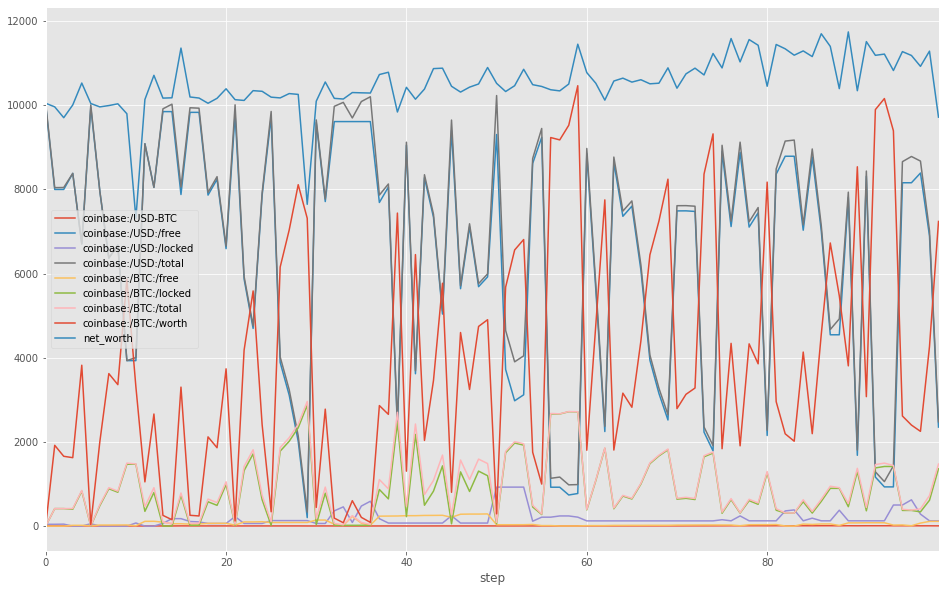

In [176]:
env.portfolio.performance.plot(figsize=(16,10))

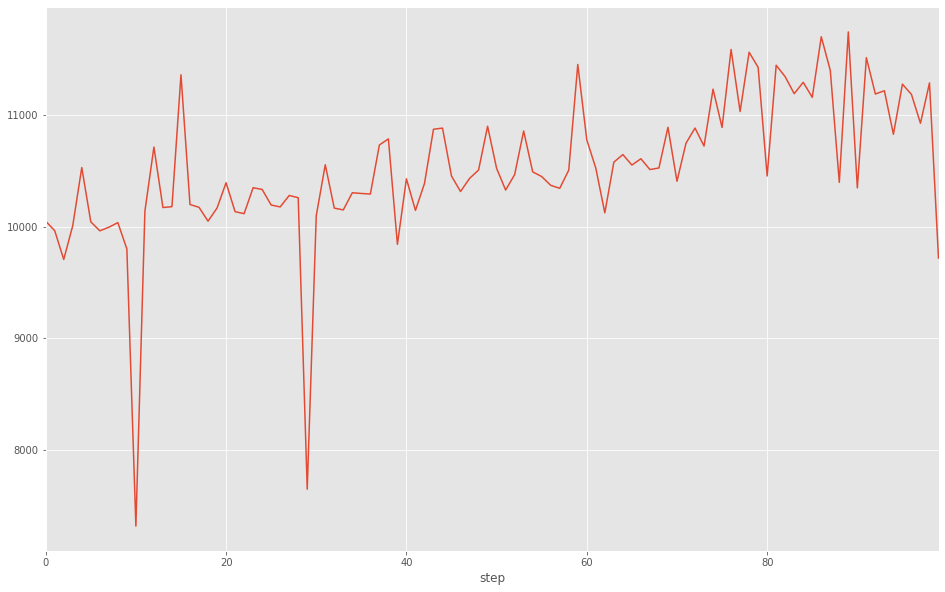

In [177]:
# 30 100
# /content/agents/policy_network__ca72398c-d7a6-44bf-b2dd-6e75aacf35a3__029.hdf5
env.portfolio.performance.net_worth.plot(figsize=(16,10))

### The above should be done on validation or test data
That is, not on the same data as we trained on (as was done above). 